In [1]:
!pip install egttools

In [2]:
import numpy as np
# Plotting libraries
import matplotlib.pylab as plt
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline
# This enables high resolution PNGs.
%config InlineBackend.figure_formats = {'png', 'svg'}

In [3]:
from egttools.analytical import replicator_equation
from egttools.analytical.utils import (calculate_gradients, find_roots, check_replicator_stability_pairwise_games,)
from egttools.plotting import plot_gradients

In [4]:
#Payoff matrix prisoners dilemma
T=3; R=7; P=1; S=0
A=np.array([[R,S],[T,P]])

In [5]:
#define a sequence of fractions of cooperators in the population
nb_points = 101
strategy_i = np.linspace(0, 1, num=nb_points, dtype=np.float64)
#strategy_i

In [6]:
# Calculate gradient for every population state.
gradient_function = lambda x: replicator_equation(x, A)
gradients = calculate_gradients(np.array((strategy_i, 1 - strategy_i)).T, gradient_function)

In [7]:
#what are the roots (fixed points) of the replicator dynamic in the PD and ae they stable?
roots = find_roots(gradient_function, 2, nb_initial_random_points=10, method="hybr")
stability = check_replicator_stability_pairwise_games(roots, A, atol_neg=1e-4, atol_pos=1e-4, atol_zero=1e-4)
#help(check_replicator_stability_pairwise_games)
roots

[array([1., 0.]), array([0., 1.]), array([0.2, 0.8])]

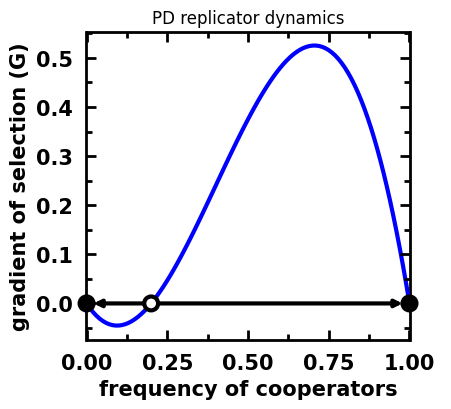

In [8]:
plot_gradients(gradients[:, 0], figsize=(5,4), fig_title="PD replicator dynamics",
               xlabel="frequency of cooperators", roots=roots, stability=stability)
plt.show()